## Mean And Median Net Worth

Overview of the mean and median networth by race, from the Survey of Consumer Finances. 


In [12]:
import sys
# Install required packages
!{sys.executable} -mpip -q install matplotlib seaborn statsmodels pandas publicdata metapack

%matplotlib inline

import pandas as pd
import geopandas as gpd
import numpy as np
import metapack as mp
import rowgenerators as rg
import publicdata as pub
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

%run ../Notebooks/lib.py 
%run ../Notebooks/weights.py 

source = "Survey of Consumer Finances, 2016 and 2019 pooled"


In [16]:
pkg = mp.open_package('http://library.metatab.org/federalreserve.gov-consumer_finances-2016e2019-inherit-1.2.3.csv')

inherit_scf_16_19 = pkg.resource('inherit_scf_16_19').dataframe()

df =   make_descriptive_df(inherit_scf_16_19)    


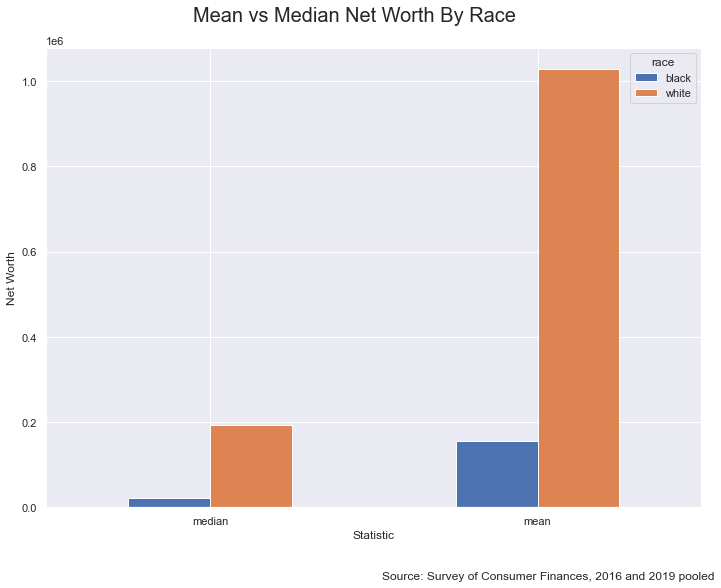

In [15]:

with new_plot('Mean vs Median Net Worth By Race', source,
             xlabel='Statistic', ylabel='Net Worth') as (fig,ax):
    a = df.groupby('race').apply(wmedian, 'networth').to_frame('median')
    #b = dfs90.groupby('race').networth.mean().to_frame('mean<90%')
    c = df.groupby('race').apply(wmean, 'networth').to_frame('mean')
    
    t = a.join(c)
    
    t.T.plot.bar(ax=ax)
    plt.xticks(rotation=0) 

In [14]:
df.groupby('race').apply(wmedian, 'networth').to_frame('median')

,median
race,
black,20325.591475
white,191758.175501


In [17]:
dft = df.copy()
dft['wt0'] /= 10 
dft.groupby('race').apply(wmedian, 'networth').to_frame('median')

,median
race,
black,20325.591475
white,191758.175501
